#Coral Area Measurements
##First Look
###Sergio Daniel Hernandez Charpak
###Jose Francisco Molano

<p>Notebook creado para el análisis de las imágenes de corales tomadas por Nancy Ruiz para el grupo BIOMMAR bajo la dirección de Susana Simancas en Uniandes en el marco del proyecto del curso Imágenes y Visión dictado por Marcela Hernández en el semestre 2016-10</p>

<p> Nuestra meta es usar esta librería http://scikit-image.org/docs/stable/api/api.html </p>

<p>Se pueden ver ejemplos en: http://scikit-image.org/docs/stable/auto_examples/index.html </p>

In [699]:
%pylab inline
import pylab
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [697]:
#from skimage.filters import threshold_otsu, threshold_adaptive
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte
from skimage.measure import label
from skimage import measure
from skimage import morphology

In [700]:
inputfolder = '../../Fotos_prueba/'

This is a test on one of the images. We will make use of the glob library to analyze all the images

In [701]:
input_image = 'IMG_6784.jpg'
output_name = './measurements_intermediate_steps_'+input_image.strip('.jpg')+'.dat'

In [702]:
fileout = open(output_name, 'w')

In [703]:
image = pylab.imread(inputfolder+input_image)

In [704]:
fileout.write("%s \n"%(inputfolder+input_image))

33

<p>The image is an RGB image. We will transform it on a first basis to simplify the process.</p>
<p> We follow the example: http://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_adapt_rgb.html#example-color-exposure-plot-adapt-rgb-py </p>

In [705]:
from skimage.color import rgb2gray
img = rgb2gray(image)

In [706]:
print (img.shape)

(3456, 5184)


In [707]:
#print (img)

In [708]:
img_mean = np.mean(img)
img_std = np.std(img)
img_max = np.max(img)
img_min = np.min(img)

In [709]:
fileout.write("%f %f %f %f \n"%(img_mean, img_std, img_max, img_min))

37

In [710]:
threshold = img_min + 3.0 *img_std

In [711]:
print (threshold)

0.320019682451


In [712]:
fileout.write("%f \n"%(threshold))

10

In [713]:
mask = img < threshold
img_thresholded = np.zeros(img.shape)
img_thresholded[mask] = 255

In [714]:
#print (mask)

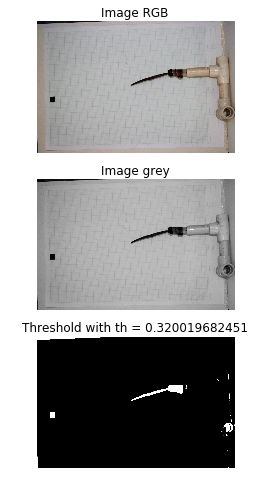

In [715]:
fig, axes = plt.subplots(nrows=3, figsize=(7, 8))
ax0, ax1, ax2 = axes
plt.gray()

ax0.imshow(image)
ax0.set_title('Image RGB')

ax1.imshow(img)
ax1.set_title('Image grey')

ax2.imshow(img_thresholded)
ax2.set_title('Threshold with th = '+ str(threshold))

for ax in axes:
    ax.axis('off')
plt.savefig("imgs_first_look.png",format = 'png')
plt.show()

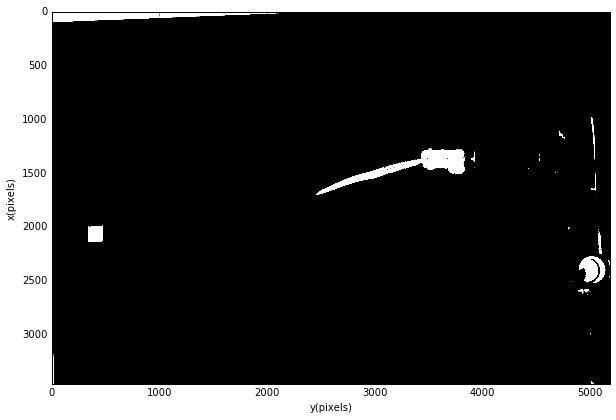

In [716]:
fig = plt.figure(figsize = (10,10))
plt.gray()
imshow(img_thresholded)
plt.savefig("img_man_umbr.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

In [717]:
plt.close(fig)

Le cortamos los bordes a la imagen

In [718]:
n_x, n_y = img_thresholded.shape

In [719]:
fileout.write("%d %d \n"%(n_x, n_y))

11

In [720]:
cut_prop = 0.04

In [721]:
fileout.write("%f \n"%(cut_prop))

10

In [722]:
n_x_new = int(n_x - n_x*cut_prop)
n_y_new = int(n_y - n_y*cut_prop)

In [723]:
n_colums_x = int(n_x*cut_prop)
n_colums_y = int(n_y*cut_prop)

In [724]:
print (n_colums_x,n_colums_y)
array_index_columns_x_0 = np.arange(n_colums_x)
array_index_columns_y_0 = np.arange(n_colums_y)

138 207


In [725]:
array_index_columns_x_final = np.linspace(n_x-n_colums_x,n_x-1, n_colums_x)
array_index_columns_y_final = np.linspace(n_y-4.0*n_colums_y,n_y-1, 4.0*n_colums_y)

In [726]:
img_delete_x = np.delete(img_thresholded,array_index_columns_x_final,0 )
img_delete_x = np.delete(img_delete_x,array_index_columns_x_0,0 )
img_delete_y = np.delete(img_delete_x,array_index_columns_y_final,1 )
img_delete_y = np.delete(img_delete_y,array_index_columns_y_0,1 )

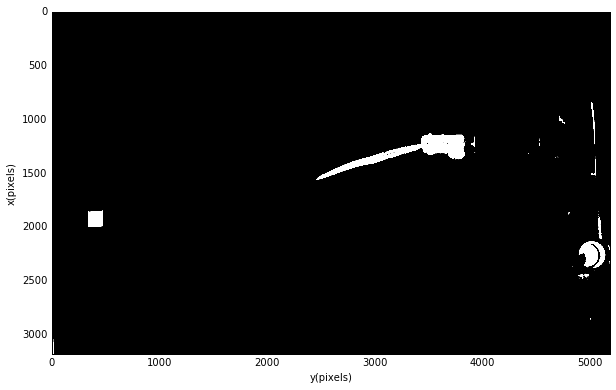

In [727]:
fig = plt.figure(figsize = (10,10))
plt.gray()
imshow(img_delete_x)
#plt.savefig("img_man_umbr_cut.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

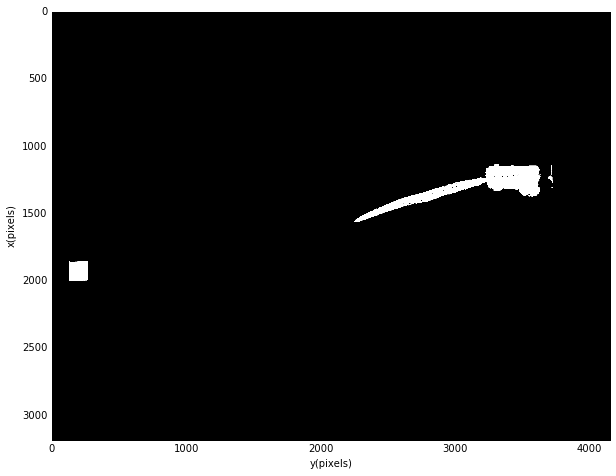

In [728]:
fig = plt.figure(figsize = (10,10))
plt.gray()
imshow(img_delete_y)
plt.savefig("img_man_umbr_cut.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

In [729]:
plt.close(fig)

In [730]:
img_thresholded_new = img_delete_y

In [731]:
n_x_new, n_y_new = img_thresholded_new.shape

In [732]:
fileout.write("%d %d \n"%(n_x_new, n_y_new))

11

##Square Area

Now we get the area of the square

In [733]:
threshold_up = int(n_y_new/4.0)

In [734]:
print (n_x_new, n_y_new, threshold_up)

3180 4149 1037


In [735]:
fileout.write("%d \n"%(threshold_up))

6

In [736]:
img_thresholded_up = np.zeros((n_x_new,n_y_new))

In [737]:
for i in range (n_x_new):
    for j in range(threshold_up):
        img_thresholded_up[i,j] = img_thresholded_new[i,j]

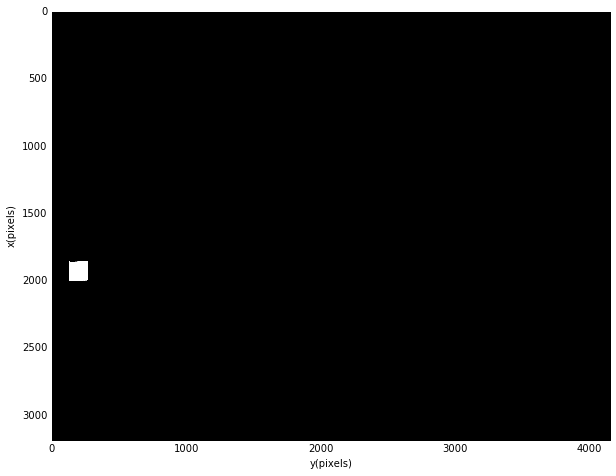

In [738]:
fig = plt.figure(figsize = (10,10))
plt.gray()
imshow(img_thresholded_up)
plt.savefig("img_man_umbr_cut_up.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

In [739]:
etiquetas_square, num = label(img_thresholded_up, connectivity=1, return_num=True)

In [740]:
hist, bins_edges = np.histogram(etiquetas_square.ravel())

In [741]:
etiquetas_square = morphology.remove_small_objects(etiquetas_square,hist[len(hist)-1])

C:\Users\sergio\Anaconda3\lib\site-packages\skimage\morphology\misc.py:119: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warnings.warn("Only one label was provided to `remove_small_objects`. "


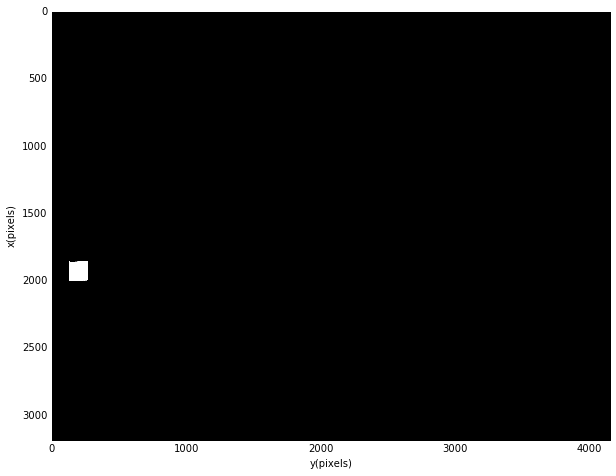

In [742]:
fig = plt.figure(figsize = (10,10))
plt.gray()
imshow(etiquetas_square)
#plt.savefig("img_man_umbr_cut_up.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

In [743]:
hist, bins_edges = np.histogram(etiquetas_square.ravel())

In [744]:
print (hist)

[13173331        0        0        0        0        0        0        0
        0    20489]


In [745]:
area_square = np.sort(hist)[len(hist)-2]

In [746]:
fileout.write("%f \n"%(area_square))

14

In [747]:
etiquetas_square =(255/np.max(etiquetas_square))*etiquetas_square

In [748]:
image_scale = (255/np.max(img_thresholded_new))*img_thresholded_new

In [749]:
image_scale= image_scale - etiquetas_square

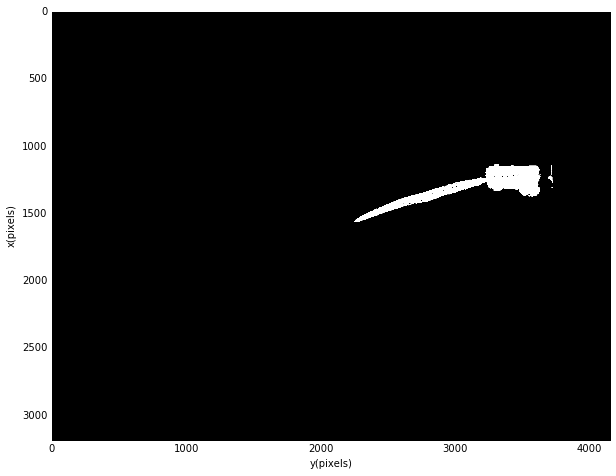

In [750]:
fig = plt.figure(figsize = (10,10))
plt.gray()
imshow(image_scale)
#plt.savefig("img_man_umbr_cut_up.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

## Coral Area

We extract the connected components to get the coral area

In [751]:
#blobs_labels = measure.label(img_thresholded_new, background=0)
etiquetas, num = label(image_scale, connectivity=2, return_num=True)

In [752]:
print (num)

138


In [753]:
etiquetas_scale = (255/np.max(etiquetas))*etiquetas

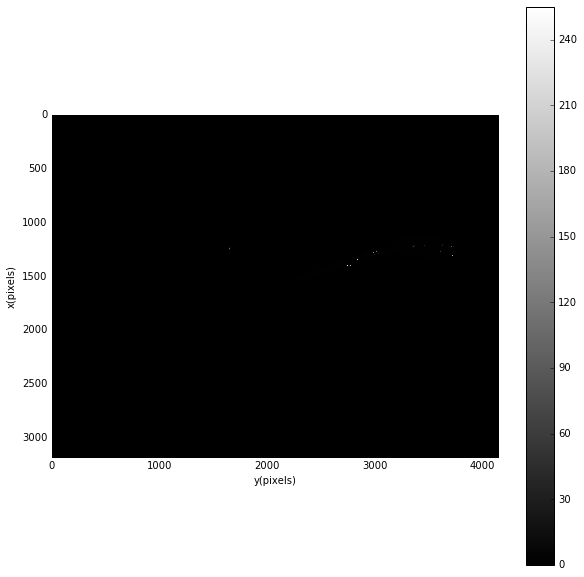

In [754]:
fig = plt.figure(figsize = (10,10))
plt.gray()
plt.imshow(etiquetas_scale)
#plt.savefig("img_man_label.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.colorbar()
plt.show()

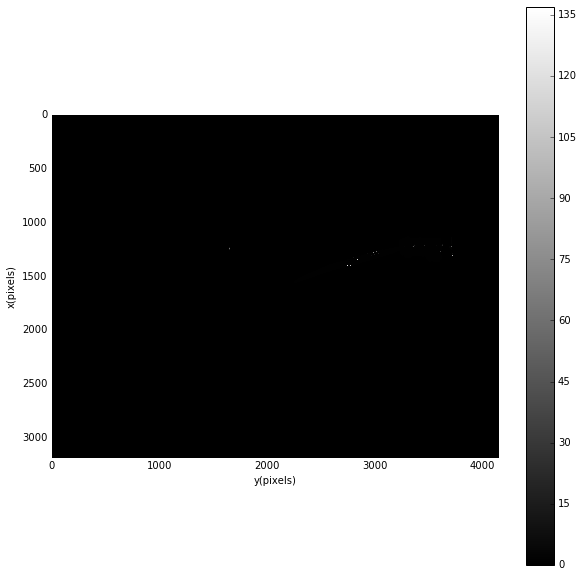

In [755]:
fig = plt.figure(figsize = (10,10))
plt.gray()
plt.imshow(etiquetas)
plt.savefig("img_man_label.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.colorbar()
plt.show()

Guardamos solo el objeto más grande luego del fondo

In [756]:
hist, bins = np.histogram(etiquetas.ravel())

In [757]:
x_hist = np.zeros(len(hist))
for i in range (len(x_hist)):
    x_hist[i] = (bins[i] + bins[i+1])/2.0

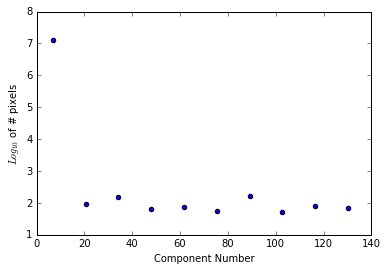

In [758]:
plt.scatter(x_hist,np.log10(hist))
plt.ylabel("$Log_{10}$ of # pixels")
plt.xlabel("Component Number")
#plt.xlim(1,len(hist))

In [759]:
hist_sorted = np.sort(hist)

In [760]:
print (hist_sorted)

[      52       57       65       70       73       80       93      155
      163 13193012]


In [761]:
threshold_rm_objects = int (hist_sorted[len(hist_sorted)-2] - hist_sorted[len(hist_sorted)-2]/5.0)

In [762]:
print (threshold_rm_objects)

130


In [763]:
fileout.write("%f \n"%(threshold_rm_objects))

12

In [764]:
c = morphology.remove_small_objects(etiquetas,threshold_rm_objects)

(array([  1.30581750e+07,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.34195000e+05,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.45000000e+03]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

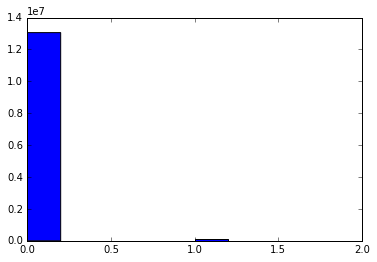

In [765]:
plt.hist(c.ravel())

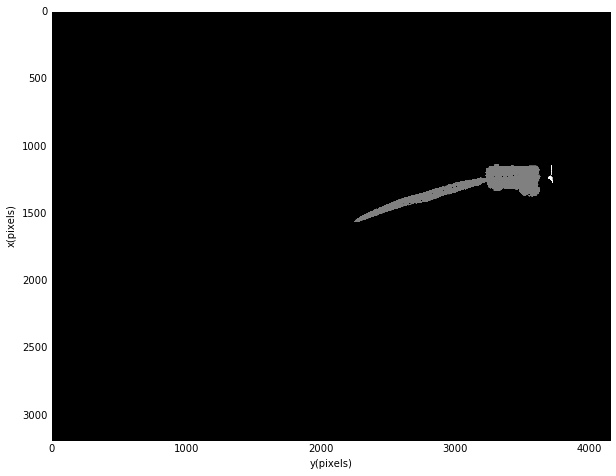

In [766]:
fig = plt.figure(figsize = (10,10))
#plt.gray()
plt.imshow(c)
plt.savefig("img_coral_holes_cut.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

In [767]:
n_dilation_erosion = 6

In [768]:
fileout.write("%d \n"%(n_dilation_erosion))

3

In [769]:
d = c
for i in range (n_dilation_erosion):
       d = morphology.dilation(d)

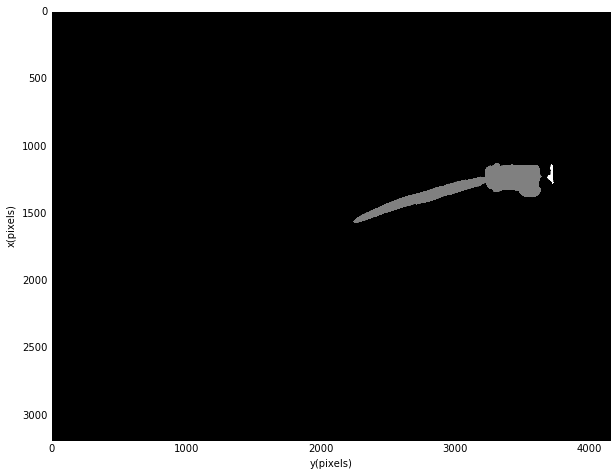

In [770]:
fig = plt.figure(figsize = (10,10))
#plt.gray()
plt.imshow(d)
#plt.savefig("img_man_umbr_cut.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

In [771]:
for i in range (n_dilation_erosion):
       d = morphology.erosion(d)

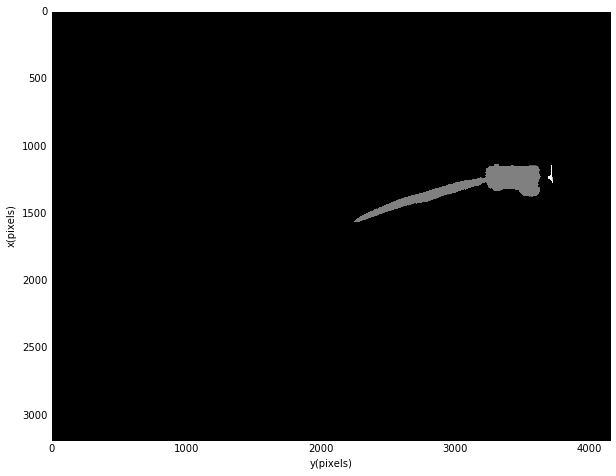

In [772]:
fig = plt.figure(figsize = (10,10))
#plt.gray()
plt.imshow(d)
#plt.savefig("img_man_umbr_cut.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

In [773]:
hist, bins = np.histogram(d.ravel())

In [774]:
print (np.sort(hist))

[       0        0        0        0        0        0        0     1546
   135372 13056902]


In [775]:
threshold_rm_objects =  (np.sort(hist)[len(hist)-2]) - int((np.sort(hist)[len(hist)-2])/10.0)

In [776]:
print (threshold_rm_objects)

121835


In [777]:
d = morphology.remove_small_objects(d,threshold_rm_objects)

In [778]:
etiquetas_coral, num = label(d, connectivity=1, return_num=True)

In [779]:
print (num)
print (etiquetas_coral.shape)

2
(3180, 4149)


In [780]:
hist, bins = np.histogram(etiquetas_coral.ravel())

In [781]:
print (hist)

[13058448        0        0        0        0        0        0        0
        0   135372]


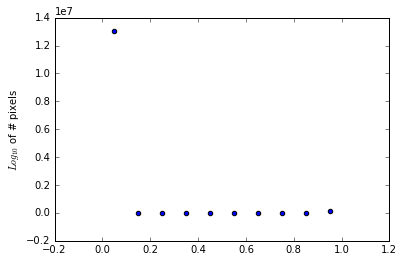

In [782]:
x_hist = np.zeros(len(hist))
for i in range (len(x_hist)):
    x_hist[i] = (bins[i] + bins[i+1])/2.0
plt.scatter(x_hist,hist)
plt.ylabel("$Log_{10}$ of # pixels")

In [783]:
area_coral_pixels = np.sort(hist)[len(hist)-2]

In [784]:
fileout.write("%f \n"%(area_coral_pixels))

15

In [785]:
area_coral_cm_2 = area_coral_pixels/area_square

In [786]:
fileout.write("%f \n"%(area_coral_cm_2))

10

In [787]:
fileout.close()

In [788]:
output_name = './area_coral_cm2_'+input_image.strip('.jpg')+'.dat'
fileout = open(output_name, 'w')
fileout.write("%f \n"%(area_coral_cm_2))
fileout.close()

In [789]:
etiquetas_coral = (255/np.max(etiquetas_coral))*etiquetas_coral

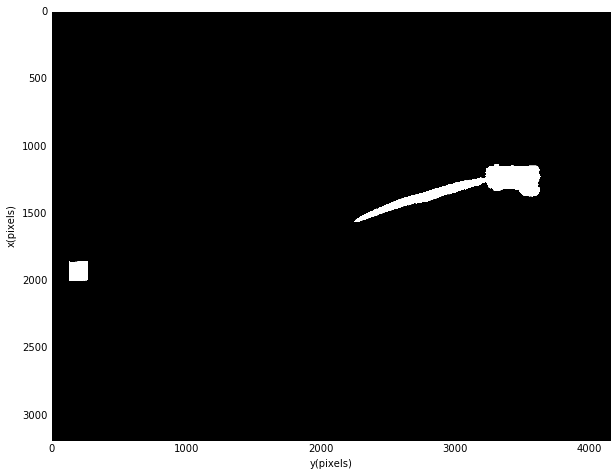

In [790]:
final_image = etiquetas_square + etiquetas_coral
fig = plt.figure(figsize = (10,10))
plt.gray()
plt.imshow(final_image)
plt.savefig("final_image_"+input_image.strip('.JPG')+".png")
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

In [791]:
plt.close(fig)